# Automated Logistics Center 

This notebook devles into the decision-making process for a major e-commerce company that is considering upgrading one of its logistics centers. We will leverage the following:

* [Decision trees](https://en.wikipedia.org/wiki/Decision_tree) (do not confuse with [classification trees](https://en.wikipedia.org/wiki/Decision_tree_learning)).
* [Influence diagrams](https://en.wikipedia.org/wiki/Influence_diagram).

#### Table of contents:

1. Framing the decision problem

2. Quantifying the decision problem

3. Modelling the problem with a decision tree

4. Modelling the problem with an influence diagram

5. Solving the influence diagram

## 1 - Framing the decision problem

A major e-commerce company is considering upgrading its logistics center with an advanced robotic automation system to optimize order fulfillment. The company must choose between three options:

1. Implement a conventional robotics system (higher automation but still requiring human labor in certain areas).  
2. Implement an advanced robotic system (AI-powered automation with robotic arms for sorting and packaging).  
3. Make no investment and retain the current logistics system.  

While the advanced system promises significant efficiency improvements, it carries a higher risk of technical failures. The company must evaluate the potential benefits and risks before making a final decision.

<table>
  <tr>
    <td>
      <img src="./images/logistics_center.jpg" alt="Logistics Center" width="500">
    </td>
  </tr>
  <tr>
    <td align="center">
      <i><b>Figure 1.</b> Automated Logistics Center. 
      (<a href="https://www.xataka.com/robotica-e-ia/primer-almacen-gestionado-integramente-robots-sigue-necesitando-a-humanos-5-tecnicos-para-tareas-mantenimiento">image source</a>)</i>
    </td>
  </tr>
</table>


### 1.1 - Options and Probabilities  

#### Conventional Robotic System:  
- **Probability of smooth operation (no failures):** 0.95  
- **Probability of system failure:** 0.05  
- **Expected financial outcomes:**  
  - **If the system operates smoothly:** €60 million in operational cost savings and efficiency gains.  
  - **If the system fails:** -€30 million due to downtime, additional labor costs, and emergency repairs.  

#### Advanced Robotic System:  
- **Probability of success (no failures):** 0.70  
- **Probability of minor failures:** 0.20  
- **Probability of major failures:** 0.10  
- **Expected financial outcomes:**  
  - **If the system operates smoothly:** €150 million in efficiency gains, faster order processing, and lower long-term costs.  
  - **If minor failures occur:** -€40 million due to delays, temporary manual intervention, and repairs.  
  - **If major failures occur:** -€120 million due to prolonged downtime, system overhauls, and reputational damage.

### 1.2 - Optional System Feasibility Test  

To reduce uncertainty before committing to the advanced system, the company can conduct an **expensive feasibility test** on critical components. The test costs **€10 million** and provides insights into the likelihood of system success or failure. The test results fall into three categories: *bad (b), good (g), or excellent (e).*  

#### Test Result Probabilities  
The probability of each test result depends on the actual performance of the robotic system:  

- **If the advanced system is fully functional (success):**  
  - P(g | success) = 0.20  
  - P(e | success) = 0.80  
- **If minor failures are likely:**  
  - P(b | minor failure) = 0.30  
  - P(g | minor failure) = 0.55  
  - P(e | minor failure) = 0.15  
- **If major failures are likely:**  
  - P(b | major failure) = 0.40  
  - P(g | major failure) = 0.40  
  - P(e | major failure) = 0.20  

### 1.3 - Regulatory Constraints  

If the test results are **bad (b)**, the company is prohibited from proceeding with the advanced robotic system due to **internal safety regulations and compliance requirements**. In this case, the company must choose between implementing the conventional logistics system or making no investment.  

### 1.4 - Decision Objective  

The company must decide whether to:  
1. Proceed without testing and implement one of the logistics systems based on expected financial outcomes.  
2. Conduct the feasibility test to reduce uncertainty before committing to the advanced system, factoring in the additional cost of the test.  

The goal is to **maximize expected net profit** by balancing potential efficiency gains with the risks of failure and the cost of uncertainty reduction.

## 2 - Quantifying the decision problem

Let's specify this information explicitly.

### 2.1 - The utility table (<span style="color: blue">U</span>)

* <span style="color: red">T</span>: Perform the test, skip the test, or take no action.
* <span style="color: red">I</span>: Implement the advanced logistics system or the conventional system.
* <span style="color: purple">A</span>: Outcomes of implementing the advanced system.
* <span style="color: purple">C</span>: Outcomes of implementing the conventional system.
* <span style="color: blue">U</span>: Utility of the decision outcome.

Notice that the test costs €10 million and that its result does not affect the utility table but does impact the expected utility.

<table>
  <tr>
    <th><span style="color: red">T</span></th>
    <th><span style="color: red">I</span></th>
    <th><span style="color: purple">A</span></th>
    <th><span style="color: purple">C</span></th>
    <th><span style="color: blue">U</span></th>
  </tr>
  <!-- 1 - TEST (12 rows) -->
  <!-- 1.1 - ADVANCED (6 rows) -->
  <tr>
    <td rowspan="12">test</td>
    <td rowspan="6">advanced</td>
    <td rowspan="2">smooth</td>
    <td>smooth</td>
    <td>140</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>140</td>
  </tr>
  <tr>
    <td rowspan="2">minor failure</td>
    <td>smooth</td>
    <td>-50</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-50</td>
  </tr>
  <tr>
    <td rowspan="2">major failure</td>
    <td>smooth</td>
    <td>-130</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-130</td>
  </tr>

  <!-- 1.2 - CONVENTIONAL (6 rows) -->
  <tr>
    <td rowspan="6">conventional</td>
    <td rowspan="2">smooth</td>
    <td>smooth</td>
    <td>50</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-40</td>
  </tr>
  <tr>
    <td rowspan="2">minor failure</td>
    <td>smooth</td>
    <td>50</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-40</td>
  </tr>
  <tr>
    <td rowspan="2">major failure</td>
    <td>smooth</td>
    <td>50</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-40</td>
  </tr>
  <!-- 2 - NO TEST (12 rows) -->
  <!-- 2.1 - ADVANCED (6 rows) -->
  <tr>
    <td rowspan="12">no test</td>
    <td rowspan="6">advanced</td>
    <td rowspan="2">smooth</td>
    <td>smooth</td>
    <td>150</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>150</td>
  </tr>
  <tr>
    <td rowspan="2">minor failure</td>
    <td>smooth</td>
    <td>-40</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-40</td>
  </tr>
  <tr>
    <td rowspan="2">major failure</td>
    <td>smooth</td>
    <td>-120</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-120</td>
  </tr>

  <!-- 2.2 - CONVENTIONAL (6 rows) -->
  <tr>
    <td rowspan="6">conventional</td>
    <td rowspan="2">smooth</td>
    <td>smooth</td>
    <td>60</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-30</td>
  </tr>
  <tr>
    <td rowspan="2">minor failure</td>
    <td>smooth</td>
    <td>60</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-30</td>
  </tr>
  <tr>
    <td rowspan="2">major failure</td>
    <td>smooth</td>
    <td>60</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>-30</td>
  </tr>
    <!-- 3 -DO NOTHING (12 rows) -->
  <!-- 3.1 - ADVANCED (6 rows) -->
  <tr>
    <td rowspan="12">do nothing</td>
    <td rowspan="6">advanced</td>
    <td rowspan="2">smooth</td>
    <td>smooth</td>
    <td>0</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0</td>
  </tr>
  <tr>
    <td rowspan="2">minor failure</td>
    <td>smooth</td>
    <td>0</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0</td>
  </tr>
  <tr>
    <td rowspan="2">major failure</td>
    <td>smooth</td>
    <td>0</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0</td>
  </tr>
  <!-- 2.2 - CONVENTIONAL (6 rows) -->
  <tr>
    <td rowspan="6">conventional</td>
    <td rowspan="2">smooth</td>
    <td>smooth</td>
    <td>0</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0</td>
  </tr>
  <tr>
    <td rowspan="2">minor failure</td>
    <td>smooth</td>
    <td>0</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0</td>
  </tr>
  <tr>
    <td rowspan="2">major failure</td>
    <td>smooth</td>
    <td>0</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0</td>
  </tr>  
</table>


### 2.2 - The prior probability distribution of the conventional system (<span style="color: purple">C</span>)

<table>
  <tr>
    <th colspan="2">P(<span style="color: purple">C</span>)</th>
  </tr>
  <tr>
    <td>smooth</td>
    <td>0.95</td>
  </tr>
  <tr>
    <td>failure</td>
    <td>0.05</td>
  </tr>
</table>

### 2.3 - The prior probability distribution of the advanced system (<span style="color: purple">A</span>)

<table>
  <tr>
    <th colspan="2">P(<span style="color: purple">A</span>)</th>
  </tr>
  <tr>
    <td>smooth</td>
    <td>0.70</td>
  </tr>
  <tr>
    <td>minor failure</td>
    <td>0.20</td>
  </tr>
  <tr>
    <td>major failure</td>
    <td>0.10</td>
  </tr>
</table>

### 2.4 - The conditional probability of the test result (<span style="color: purple">R</span> | <span style="color: purple">A</span>)

The probability of each test result depends on the actual performance of the robotic system:  

<table>
    <tr>
        <th>P(<span style="color: purple">R</span> | <span style="color: purple">A</span>)</th>
        <th>Smooth</th>
        <th>Minor Failure</th>
        <th>Major Failure</th>
    </tr>
    <tr>
        <td>bad</td>
        <td>0.0</td>
        <td>0.30</td>
        <td>0.40</td>
    </tr>
    <tr>
        <td>good</td>
        <td>0.20</td>
        <td>0.55</td>
        <td>0.40</td>
    </tr>
    <tr>
        <td>excellent</td>
        <td>0.80</td>
        <td>0.15</td>
        <td>0.20</td>
    </tr>
</table>

## 3 - Modelling the problem with a decision tree

Notice that the test costs €10 million and that its result does not affect the utility table but does impact the expected utility.

<table>
  <tr>
    <td>
      <img src="./images/logistics_decision_tree_horizontal.png" alt="Decision tree for automating the logistics center" width="900">
    </td>
  </tr>
  <tr>
    <td align="center">
      <i><b>Figure 2.</b> Decision tree for automating the logistics center</i>
    </td>
  </tr>
</table>

## 4 - Evaluating the decision tree to find the optimal policy

### 4.1 - Compute expected utilities

#### ▶ No test performed

If the company chooses choose **not to perform the feasibility test**, then it must decide wether to implement the conventional robotic system, the advanced robotic system, or do nothing solely on the prior probabilities of each system.

1. We compute the expected utility of implementing a conventional robotic system:

$$
\begin{aligned}
\mathbb{E}[U \mid \text{no test}, \text{conventional}] &= 0.95 \times 60 + 0.05 \times (-30) \\
&= 57 + (-1.5)  \\
&= 55.5
\end{aligned}
$$

2. We compute the expected utility of implementing an advanced robotic system:

$$
\begin{aligned}
\mathbb{E}[U \mid \text{no test}, \text{advanced}] &= 0.70 \times 150 + 0.20 \times (-40) + 0.10 \times (-150) \\
&= 105 + (-8) + (-15) \\
&= 82
\end{aligned}
$$

3. We compare the expected utility of the three options:

   * **Conventional system:** 55.5
   * **Advanced system:** 82
   * **Do nothing:** 0

> Since 82 > 55.5 > 0, it is better to build an advanced system

#### ▶ Perform the test and the result is $R = $`excellent`

1. We compute the **marginal probability** of obtaining a `excellent` result:

$$
\begin{aligned}
P(R = \text{excellent}) &= P(R = \text{excellent} \mid A = \text{smooth}) \cdot P(A = \text{smooth}) \\
&\quad + P(R = \text{excellent} \mid A = \text{minor\_failure}) \cdot P(A = \text{minor\_failure}) \\
&\quad + P(R = \text{excellent} \mid A = \text{major\_failure}) \cdot P(A = \text{major\_failure}) \\
&= 0.8 \times 0.7 + 0.15 \times 0.2 + 0.2 \times 0.1 \\
&= 0.56 + 0.03 + 0.02 = 0.61
\end{aligned}
$$


2. We use **Bayes’ Theorem** to compute the posterior probabilities of  $A$ given that the test result is a `excellent`:

$$
\begin{aligned}
P(A = \text{smooth} \mid R = \text{excellent}) &= \frac{0.8 \times 0.7}{0.61} = 0.918 \\
P(A = \text{minor\_failure} \mid R = \text{excellent}) &= \frac{0.15 \times 0.2}{0.61} = 0.049 \\
P(A = \text{major\_failure} \mid R = \text{excellent}) &= \frac{0.2 \times 0.1}{0.61} = 0.033
\end{aligned}
$$

3. We compute the expected utility of buying after a `excellent` result:

$$
\mathbb{E}[U \mid R = \text{excellent}, \text{advanced}] = 0.918 \times 140 + 0.049 \times (-50) + 0.033 \times (-130) = 121.78
$$

4. We compute the expected utility of implementing a conventional robotic system (after paying for the test):

$$
\begin{aligned}
\mathbb{E}[U \mid R = \text{excellent}, \text{conventional}] &= 0.95 \times 50 + 0.05 \times (-40) \\
&= 47.5 + (-2)  \\
&= 45.5
\end{aligned}
$$

4. We compare the expected utility of the three options:

   * **Conventional system:** 45.5 (the test is just an extra cost)
   * **Advanced system:** 121.78
   * **Do nothing:** 0

> Since 121.78 > 55.5 > 0, it is better to build an advanced system if the test result is `excellent`

#### ▶ Perform the test and the result is $R = $`good`

1. We compute the **marginal probability** of obtaining a `good` result:

$$
\begin{aligned}
P(R = \text{good}) &= P(R = \text{good} \mid A = \text{smooth}) \cdot P(A = \text{smooth}) \\
&\quad + P(R = \text{good} \mid A = \text{minor\_failure}) \cdot P(A = \text{minor\_failure}) \\
&\quad + P(R = \text{good} \mid A = \text{major\_failure}) \cdot P(A = \text{major\_failure}) \\
&= 0.20 \times 0.7 + 0.55 \times 0.2 + 0.40 \times 0.1 \\
&= 0.14 + 0.11 + 0.04 = 0.29
\end{aligned}
$$

2. We use **Bayes’ Theorem** to compute the posterior probabilities of $A$ given that the test result is `good`:

$$
\begin{aligned}
P(A = \text{smooth} \mid R = \text{good}) &= \frac{0.20 \times 0.7}{0.29} = \frac{0.14}{0.29} = 0.483 \\
P(A = \text{minor\_failure} \mid R = \text{good}) &= \frac{0.55 \times 0.2}{0.29} = \frac{0.11}{0.29} = 0.379 \\
P(A = \text{major\_failure} \mid R = \text{good}) &= \frac{0.40 \times 0.1}{0.29} = \frac{0.04}{0.29} = 0.138
\end{aligned}
$$

3. We compute the expected utility of implementing and advanced robotic system after a `good` result:

$$
\begin{aligned}
\mathbb{E}[U \mid R = \text{good}, \text{advanced}] &= 0.483 \times 140 + 0.379 \times (-50) + 0.138 \times (-130) \\
&= 67.62 - 18.95 - 17.94 = 30.73
\end{aligned}
$$

4. We compute the expected utility of implementing a conventional robotic system (after paying for the test):

$$
\begin{aligned}
\mathbb{E}[U \mid R = \text{good}, \text{conventional}] &= 0.95 \times 50 + 0.05 \times (-40) \\
&= 47.5 + (-2)  \\
&= 45.5
\end{aligned}
$$

5. We compare the expected utility of the three options:

   * **Conventional system:** 45.5 (the test is just an extra cost)
   * **Advanced system (after `good` result):** 30.73
   * **Do nothing:** 0

> Since 45.5 > 30.73 > 0, it is better to **implement the conventional system** if the test result is `good`.


#### ▶ Perform the test and the result is $R = $`bad`

1. We compute the **marginal probability** of obtaining a `bad` result:

$$
\begin{aligned}
P(R = \text{bad}) &= P(R = \text{bad} \mid A = \text{smooth}) \cdot P(A = \text{smooth}) \\
&\quad + P(R = \text{bad} \mid A = \text{minor\_failure}) \cdot P(A = \text{minor\_failure}) \\
&\quad + P(R = \text{bad} \mid A = \text{major\_failure}) \cdot P(A = \text{major\_failure}) \\
&= 0.0 \times 0.7 + 0.30 \times 0.2 + 0.40 \times 0.1 \\
&= 0 + 0.06 + 0.04 = 0.10
\end{aligned}
$$

2. We use **Bayes’ Theorem** to compute the posterior probabilities of $A$ given that the test result is `bad`:

$$
\begin{aligned}
P(A = \text{smooth} \mid R = \text{bad}) &= \frac{0.0 \times 0.7}{0.10} = 0 \\
P(A = \text{minor\_failure} \mid R = \text{bad}) &= \frac{0.30 \times 0.2}{0.10} = \frac{0.06}{0.10} = 0.60 \\
P(A = \text{major\_failure} \mid R = \text{bad}) &= \frac{0.40 \times 0.1}{0.10} = \frac{0.04}{0.10} = 0.40
\end{aligned}
$$

3. We compute the expected utility of buying after a `bad` result:

$$
\begin{aligned}
\mathbb{E}[U \mid R = \text{bad}, \text{advanced}] &= 0 \times 140 + 0.60 \times (-50) + 0.40 \times (-130) \\
&= 0 - 30 - 52 \\
&= -82
\end{aligned}
$$

4. We compute the expected utility of implementing a conventional robotic system (after paying for the test):

$$
\begin{aligned}
\mathbb{E}[U \mid R = \text{bad}, \text{conventional}] &= 0.95 \times 50 + 0.05 \times (-40) \\
&= 47.5 + (-2)  \\
&= 45.5
\end{aligned}
$$

5. We compare the expected utility of the three options:

   * **Conventional system:** 45.5
   * **Advanced system (after `bad` result):** -82
   * **Do nothing:** 0

> Since 45.5 > 0 > -82, it is better to **implement the conventional system or do nothing** rather than buy the advanced system if the test result is `bad`.

#### ▶ Evaluating the Root Decision: Test vs. No Test

We now return to the **top-level decision**:  

> **Should the company perform the feasibility test or skip it entirely?**

1. Expected Utility of Performing the Test

If the company performs the test, the overall expected utility is computed by weighting the outcomes of possible test results:

$$
\begin{aligned}
\mathbb{E}[U \mid \text{test}] &= P(R = \text{excellent}) \cdot \mathbb{E}[U \mid R = \text{excellent}] \\
&\quad + P(R = \text{good}) \cdot \mathbb{E}[U \mid R = \text{good}] \\
&\quad + P(R = \text{bad}) \cdot \mathbb{E}[U \mid R = \text{bad}] \\
&= 0.61 \times 121.78 + 0.29 \times 45.5 + 0.10 \times 45.5 \\
&= 92.03
\end{aligned}
$$

Here, we assume that the company implementes the **advanced** system if the test passes with an excellent result, and builds a conventional system in any of the other cases.

2. Expected Utility of Not Perfroming the Test:

From earlier we know it is **82**

3. Compare the Options

- **Perform Test:** 92.03
- **No Test:** 82

> 🔍 **Conclusion:** Since $92.03 > 82$ , the company should **perform the test** and depending of the result implement either an advanced or conventional robotic system.

### 4.2 - Python implementation

In [26]:
# Prior probabilities of system states
P_smooth = 0.7
P_minor_failure = 0.2
P_major_failure = 0.1

# Prior probabilities for conventional system outcomes
P_conv_success = 0.95
P_conv_failure = 0.05

# Test likelihoods P(R | A)
P_R_given_smooth = {'excellent': 0.8, 'good': 0.20, 'bad': 0.0}
P_R_given_minor = {'excellent': 0.15, 'good': 0.55, 'bad': 0.30}
P_R_given_major = {'excellent': 0.2, 'good': 0.40, 'bad': 0.40}

# Utilities
conv_success_utility = 60
conv_failure_utility = -30
conv_tested_success_utility = 50
conv_tested_failure_utility = -40

adv_utilities_prior = {
    'smooth': 150,
    'minor_failure': -40,
    'major_failure': -150,
}

adv_utilities_tested = {
    'smooth': 140,
    'minor_failure': -50,
    'major_failure': -130,
}

do_nothing_utility = 0

# --- 1. No test performed ---

EU_no_test_conv = P_conv_success * conv_success_utility + P_conv_failure * conv_failure_utility
print(f"Expected utility without test - Conventional: {EU_no_test_conv:.2f}")

EU_no_test_adv = (
    P_smooth * adv_utilities_prior['smooth'] +
    P_minor_failure * adv_utilities_prior['minor_failure'] +
    P_major_failure * adv_utilities_prior['major_failure']
)
print(f"Expected utility without test - Advanced: {EU_no_test_adv:.2f}")

print(f"Expected utility without test - Do nothing: {do_nothing_utility}")

# --- 2. Marginal probabilities of test results ---

P_R_excellent = (
    P_R_given_smooth['excellent'] * P_smooth +
    P_R_given_minor['excellent'] * P_minor_failure +
    P_R_given_major['excellent'] * P_major_failure
)
print(f"\nP(R=excellent): {P_R_excellent:.3f}")

P_R_good = (
    P_R_given_smooth['good'] * P_smooth +
    P_R_given_minor['good'] * P_minor_failure +
    P_R_given_major['good'] * P_major_failure
)
print(f"P(R=good): {P_R_good:.3f}")

P_R_bad = (
    P_R_given_smooth['bad'] * P_smooth +
    P_R_given_minor['bad'] * P_minor_failure +
    P_R_given_major['bad'] * P_major_failure
)
print(f"P(R=bad): {P_R_bad:.3f}")

# --- 3. Posterior probabilities given test results ---

# For R = excellent
post_smooth_excellent = (P_R_given_smooth['excellent'] * P_smooth) / P_R_excellent
post_minor_excellent = (P_R_given_minor['excellent'] * P_minor_failure) / P_R_excellent
post_major_excellent = (P_R_given_major['excellent'] * P_major_failure) / P_R_excellent

print("\nPosterior probabilities given R=excellent:")
print(f"P(A=smooth|R=excellent): {post_smooth_excellent:.3f}")
print(f"P(A=minor_failure|R=excellent): {post_minor_excellent:.3f}")
print(f"P(A=major_failure|R=excellent): {post_major_excellent:.3f}")

# For R = good
post_smooth_good = (P_R_given_smooth['good'] * P_smooth) / P_R_good
post_minor_good = (P_R_given_minor['good'] * P_minor_failure) / P_R_good
post_major_good = (P_R_given_major['good'] * P_major_failure) / P_R_good

print("\nPosterior probabilities given R=good:")
print(f"P(A=smooth|R=good): {post_smooth_good:.3f}")
print(f"P(A=minor_failure|R=good): {post_minor_good:.3f}")
print(f"P(A=major_failure|R=good): {post_major_good:.3f}")

# For R = bad
post_smooth_bad = (P_R_given_smooth['bad'] * P_smooth) / P_R_bad if P_R_bad != 0 else 0
post_minor_bad = (P_R_given_minor['bad'] * P_minor_failure) / P_R_bad if P_R_bad != 0 else 0
post_major_bad = (P_R_given_major['bad'] * P_major_failure) / P_R_bad if P_R_bad != 0 else 0

print("\nPosterior probabilities given R=bad:")
print(f"P(A=smooth|R=bad): {post_smooth_bad:.3f}")
print(f"P(A=minor_failure|R=bad): {post_minor_bad:.3f}")
print(f"P(A=major_failure|R=bad): {post_major_bad:.3f}")

# --- 4. Expected utilities after test results ---

# R = excellent
EU_adv_excellent = (
    post_smooth_excellent * adv_utilities_tested['smooth'] +
    post_minor_excellent * adv_utilities_tested['minor_failure'] +
    post_major_excellent * adv_utilities_tested['major_failure']
)
EU_conv_excellent = P_conv_success * conv_tested_success_utility + P_conv_failure * conv_tested_failure_utility

print(f"\nExpected utility after R=excellent:")
print(f"Advanced system: {EU_adv_excellent:.2f}")
print(f"Conventional system: {EU_conv_excellent:.2f}")
print(f"Do nothing: {do_nothing_utility}")

# R = good
EU_adv_good = (
    post_smooth_good * adv_utilities_tested['smooth'] +
    post_minor_good * adv_utilities_tested['minor_failure'] +
    post_major_good * adv_utilities_tested['major_failure']
)
EU_conv_good = P_conv_success * conv_tested_success_utility + P_conv_failure * conv_tested_failure_utility

print(f"\nExpected utility after R=good:")
print(f"Advanced system: {EU_adv_good:.2f}")
print(f"Conventional system: {EU_conv_good:.2f}")
print(f"Do nothing: {do_nothing_utility}")

# R = bad
EU_adv_bad = (
    post_smooth_bad * adv_utilities_tested['smooth'] +
    post_minor_bad * adv_utilities_tested['minor_failure'] +
    post_major_bad * adv_utilities_tested['major_failure']
)
EU_conv_bad = P_conv_success * conv_tested_success_utility + P_conv_failure * conv_tested_failure_utility

print(f"\nExpected utility after R=bad:")
print(f"Advanced system: {EU_adv_bad:.2f}")
print(f"Conventional system: {EU_conv_bad:.2f}")
print(f"Do nothing: {do_nothing_utility}")

# --- 5. Optimal decision after each test result ---

options_excellent = {
    'advanced': EU_adv_excellent,
    'conventional': EU_conv_excellent,
    'do_nothing': do_nothing_utility
}
best_option_excellent = max(options_excellent, key=options_excellent.get)
print(f"\nBest action if R=excellent: {best_option_excellent} system")

options_good = {
    'advanced': EU_adv_good,
    'conventional': EU_conv_good,
    'do_nothing': do_nothing_utility
}
best_option_good = max(options_good, key=options_good.get)
print(f"Best action if R=good: {best_option_good} system")

options_bad = {
    'advanced': EU_adv_bad,
    'conventional': EU_conv_bad,
    'do_nothing': do_nothing_utility
}
best_option_bad = max(options_bad, key=options_bad.get)
print(f"Best action if R=bad: {best_option_bad} system")

# --- 6. Expected utility of performing the test ---

# According to your example policy: advanced if excellent, conventional otherwise
EU_test = (
    P_R_excellent * EU_adv_excellent +
    P_R_good * EU_conv_good +
    P_R_bad * EU_conv_bad
)
print(f"\nExpected utility if performing the test: {EU_test:.2f}")

# --- 7. Compare to no-test scenario ---

best_no_test_EU = max(EU_no_test_adv, EU_no_test_conv, do_nothing_utility)
print(f"Expected utility if NOT performing the test: {best_no_test_EU:.2f}")

if EU_test > best_no_test_EU:
    print("Recommendation: Perform the test and follow policy based on results.")
else:
    print("Recommendation: Skip the test and choose system with highest prior expected utility.")

Expected utility without test - Conventional: 55.50
Expected utility without test - Advanced: 82.00
Expected utility without test - Do nothing: 0

P(R=excellent): 0.610
P(R=good): 0.290
P(R=bad): 0.100

Posterior probabilities given R=excellent:
P(A=smooth|R=excellent): 0.918
P(A=minor_failure|R=excellent): 0.049
P(A=major_failure|R=excellent): 0.033

Posterior probabilities given R=good:
P(A=smooth|R=good): 0.483
P(A=minor_failure|R=good): 0.379
P(A=major_failure|R=good): 0.138

Posterior probabilities given R=bad:
P(A=smooth|R=bad): 0.000
P(A=minor_failure|R=bad): 0.600
P(A=major_failure|R=bad): 0.400

Expected utility after R=excellent:
Advanced system: 121.80
Conventional system: 45.50
Do nothing: 0

Expected utility after R=good:
Advanced system: 30.69
Conventional system: 45.50
Do nothing: 0

Expected utility after R=bad:
Advanced system: -82.00
Conventional system: 45.50
Do nothing: 0

Best action if R=excellent: advanced system
Best action if R=good: conventional system
Best ac

### 4.3 - Evaluated decision tree

<table>
  <tr>
    <td>
      <img src="./images/logistics_evaluated_decision_tree.png" alt="Evaluated decision tree for automating the logistics center" width="900">
    </td>
  </tr>
  <tr>
    <td align="center">
      <i><b>Figure 2.</b> Evaluated decision tree for automating the logistics center</i>
    </td>
  </tr>
</table>

## 5 - Modelling the problem with an influence diagram

<table>
  <tr>
    <td>
      <img src="./images/logistics_influence_diagram.png" alt="Logistics system influence diagram" width="300">
    </td>
  </tr>
  <tr>
    <td align="center">
      <i><b>Figure 3.</b> Logistics system influence diagram.</i>
    </td>
  </tr>
</table>

### 5.1 - Implementation with PyAgrum

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pyagrum as grum
import numpy as np
from pyagrum import InfluenceDiagram

In [2]:
influence_diagram = InfluenceDiagram()

A = influence_diagram.addChanceNode(
    grum.LabelizedVariable("A", "C", 0)
    .addLabel('smooth')
    .addLabel('minor_failure')
    .addLabel('major_failure')
)

C = influence_diagram.addChanceNode(
    grum.LabelizedVariable("C", "C", 0)
    .addLabel('smooth')
    .addLabel('failure')
)

R = influence_diagram.addChanceNode(
    grum.LabelizedVariable("R", "R", 0)
    .addLabel('bad')
    .addLabel('good')
    .addLabel('excellent')
    .addLabel('no_results') # We add this extra state to represent the asymmetric case when T != test
)

T = influence_diagram.addDecisionNode(
    grum.LabelizedVariable("T", "T", 0)
    .addLabel('test')
    .addLabel('no_test')
    .addLabel('nothing')
)

I = influence_diagram.addDecisionNode(
    grum.LabelizedVariable("I", "I", 0)
    .addLabel('advanced')
    .addLabel('conventional')
)

U = influence_diagram.addUtilityNode(
    grum.LabelizedVariable("U", "U", 0)
    .addLabel('utility')
)

influence_diagram.addArc("T", "R")
influence_diagram.addArc("T", "I")  # memory arc
influence_diagram.addArc("T", "U")
influence_diagram.addArc("R", "I")
influence_diagram.addArc("I", "U")
influence_diagram.addArc("A", "R")
influence_diagram.addArc("A", "U")
influence_diagram.addArc("C", "U")

gnb.sideBySide(influence_diagram, captions=["Oil field influence diagram"])


In [3]:
influence_diagram.cpt(C)[:]=[0.95, 0.05]

influence_diagram.cpt(A)[:]=[0.70, 0.20, 0.10]

influence_diagram.cpt(R)[{"A": "smooth", "T": "test"}]=[0.0, 0.2, 0.8, 0.0] # R: bad, good, excellent, no_results
influence_diagram.cpt(R)[{"A": "smooth", "T": "no_test"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "smooth", "T": "nothing"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "minor_failure", "T": "test"}]=[0.3, 0.55, 0.15, 0.0]
influence_diagram.cpt(R)[{"A": "minor_failure", "T": "no_test"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "minor_failure", "T": "nothing"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "major_failure", "T": "test"}]=[0.4, 0.4, 0.2, 0.0]
influence_diagram.cpt(R)[{"A": "major_failure", "T": "no_test"}]=[0.0, 0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"A": "major_failure", "T": "nothing"}]=[0.0, 0.0, 0.0, 1.0]

# It is a bit weird because we are assigning it in a "backwards" manner
influence_diagram.utility(U)[{"T": "test", "I": "advanced", "A": "smooth" }]=np.array([140, 140])[:, np.newaxis] # C: smooth, failure
influence_diagram.utility(U)[{"T": "test", "I": "advanced", "A": "minor_failure" }]=np.array([-50, -50])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "advanced", "A": "major_failure" }]=np.array([-130, -130])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "conventional", "A": "smooth" }]=np.array([50, -40])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "conventional", "A": "minor_failure" }]=np.array([50, -40])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "test", "I": "conventional", "A": "major_failure" }]=np.array([50, -40])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "advanced", "A": "smooth" }]=np.array([150, 150])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "advanced", "A": "minor_failure" }]=np.array([-40, -40])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "advanced", "A": "major_failure" }]=np.array([-120, -120])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "conventional", "A": "smooth" }]=np.array([60, -30])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "conventional", "A": "minor_failure" }]=np.array([60, -30])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "no_test", "I": "conventional", "A": "major_failure" }]=np.array([60, -30])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "advanced", "A": "smooth" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "advanced", "A": "minor_failure" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "advanced", "A": "major_failure" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "conventional", "A": "smooth" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "conventional", "A": "minor_failure" }]=np.array([0, 0])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "nothing", "I": "conventional", "A": "major_failure" }]=np.array([0, 0])[:, np.newaxis]

In [4]:
gnb.showPotential(influence_diagram.cpt(C))
gnb.showPotential(influence_diagram.cpt(A))
gnb.showPotential(influence_diagram.cpt(R))
gnb.showPotential(influence_diagram.utility(U))

## 6 - Solving the influence diagram

Once the influence diagram is built, we can use inference algorithms to determine the optimal decision strategy that maximizes expected utility, given the uncertainties and dependencies present in the model.

The Shenoy-Shafer algorithm offers several advantages over other methods:

* Unified treatment of probabilities and utilities.
* Local computation approach.
* Flexibility in variable elimination.
* Modularity.
* Efficiency in handling LIMIDs.
* Reduced computational complexity.

[PyAgrum features an implementation of the Shenoy-Shafer algorithm tailored for LIMIDs through the `ShaferShenoyLIMIDInference` class.](https://pyagrum.readthedocs.io/en/latest/influenceDiagram.html#pyAgrum.ShaferShenoyLIMIDInference)

### 6.1 - Implementation with PyAgrum

In [5]:
inference_engine = gum.ShaferShenoyLIMIDInference(influence_diagram)
inference_engine.makeInference()

print(f"Is the diagram solvable?: {inference_engine.isSolvable()}")

Is the diagram solvable?: True


In [6]:
inference_engine.optimalDecision("T")

(pyagrum.Tensor@0x14184c200) 
  T                          |
test     |no_test  |nothing  |
---------|---------|---------|
 1.0000  | 0.0000  | 0.0000  |

In [7]:
inference_engine.optimalDecision("I")

(pyagrum.Tensor@0x150ee9ad0) 
      ||  I                |
R     ||advanced |conventio|
------||---------|---------|
bad   || 0.0000  | 1.0000  |
good  || 0.0000  | 1.0000  |
excell|| 1.0000  | 0.0000  |
no_res|| 1.0000  | 0.0000  |

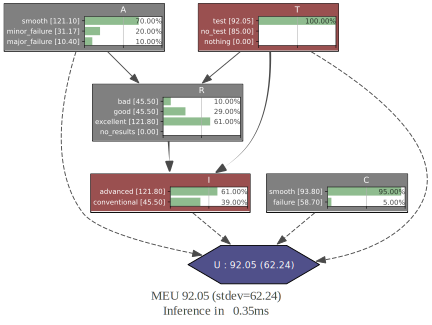

In [8]:
gnb.showInference(influence_diagram,engine=inference_engine,size="6!")